In [1]:
# Import all the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import re
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the random forest classifier - This is a classification problem and I think this is the best model for prediction
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import compose
from xgboost import XGBClassifier

In [3]:
catg_feature_names = [
    'funder',
    'basin',
    'region',                    
    'district_code',
    'lga',
    'scheme_management',
    'extraction_type',
    'extraction_type_class',
    'management',
    'payment_type',
    'water_quality',
    'quantity',
    'source',     
    'source_class',
#    'waterpoint_type_group'
]

num_feature_names = [
#    'amount_tsh',
#    'gps_height',
    'longitude',
    'latitude',
#    'population',
    'construction_year',
    'pump_age'
]

date_feature_names = [
#    'date_recorded',
    'year_rec',
    'week_rec',
    'day_rec'
]

label_names = ['status_group']

In [4]:
# Load the cleaned dataset and view the first few rows
df = pd.read_csv('data/cleaned_df_v2.csv', usecols= ['date_recorded'] + catg_feature_names + num_feature_names + label_names)
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_recorded          59400 non-null  datetime64[ns]
 1   funder                 59400 non-null  object        
 2   longitude              59400 non-null  float64       
 3   latitude               59400 non-null  float64       
 4   basin                  59400 non-null  object        
 5   region                 59400 non-null  object        
 6   district_code          59400 non-null  int64         
 7   lga                    59400 non-null  object        
 8   scheme_management      59400 non-null  object        
 9   construction_year      59400 non-null  float64       
 10  extraction_type        59400 non-null  object        
 11  extraction_type_class  59400 non-null  object        
 12  management             59400 non-null  object        
 13  p

In [5]:
# Adding date features...
df['year_rec'] = df['date_recorded'].apply(lambda x: pd.to_datetime(x).date().isocalendar()[0])
df['week_rec'] = df['date_recorded'].apply(lambda x: pd.to_datetime(x).date().isocalendar()[1])
df['day_rec'] = df['date_recorded'].apply(lambda x: pd.to_datetime(x).date().isocalendar()[2])
df.drop('date_recorded', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   funder                 59400 non-null  object 
 1   longitude              59400 non-null  float64
 2   latitude               59400 non-null  float64
 3   basin                  59400 non-null  object 
 4   region                 59400 non-null  object 
 5   district_code          59400 non-null  int64  
 6   lga                    59400 non-null  object 
 7   scheme_management      59400 non-null  object 
 8   construction_year      59400 non-null  float64
 9   extraction_type        59400 non-null  object 
 10  extraction_type_class  59400 non-null  object 
 11  management             59400 non-null  object 
 12  payment_type           59400 non-null  object 
 13  water_quality          59400 non-null  object 
 14  quantity               59400 non-null  object 
 15  so

### Reducing the levels and transformation of categorical data
The levels of some of the categorical variables were reduced to keep a manageable number of features. Small-size levels were grouped into a separate level named 'OTHERS':

In [6]:
'''top_ith = 10 # Maximum levels to keep for categorical variables 
for catg_feature in catg_feature_names:
    unique_percent_counts = df[catg_feature].value_counts()
        
    top_frequent_indexes = unique_percent_counts[:top_ith-1].index.values.tolist()
    x = df[catg_feature].copy()
    x[~x.isin(top_frequent_indexes)] = 'OTHER'

    # setting values in cleaned dataset
    df.loc[:,catg_feature] = x
    # Seeing new data frame
    df[catg_feature].value_counts()
    
    #print(df[catg_feature],'\n', unique_percent_counts)'''

"top_ith = 10 # Maximum levels to keep for categorical variables \nfor catg_feature in catg_feature_names:\n    unique_percent_counts = df[catg_feature].value_counts()\n        \n    top_frequent_indexes = unique_percent_counts[:top_ith-1].index.values.tolist()\n    x = df[catg_feature].copy()\n    x[~x.isin(top_frequent_indexes)] = 'OTHER'\n\n    # setting values in cleaned dataset\n    df.loc[:,catg_feature] = x\n    # Seeing new data frame\n    df[catg_feature].value_counts()\n    \n    #print(df[catg_feature],'\n', unique_percent_counts)"

In [7]:
#df.funder.unique()

In [8]:
#df.loc[:,catg_feature_names]

In [9]:
# Transform and combine categorical and numerical features:
catg_transformer = compose.ColumnTransformer(
    transformers=
    [
     ('catg', preprocessing.OneHotEncoder(), catg_feature_names),
    ],
    #remainder='drop',
    sparse_threshold=0.0,
    #n_jobs=None,
    transformer_weights=None,
    #verbose=False
)

catg_transformer.fit(df.loc[:,catg_feature_names])

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.0,
         transformer_weights=None,
         transformers=[('catg', OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True), ['funder', 'basin', 'region', 'district_code', 'lga', 'scheme_management', 'extraction_type', 'extraction_type_class', 'management', 'payment_type', 'water_quality', 'quantity', 'source', 'source_class'])])

In [10]:
#catg_transformer.transformers_

In [11]:
#onehot_encoder.get_feature_names()

In [12]:
def get_name_and_levels(onehot_encoder: compose.ColumnTransformer , catg_names):
    """
    Gets 'transformed catg feature' names from compose.ColumnTransformer object and catg feature names.

    """
    onehot_feature_names = onehot_encoder.get_feature_names()

    f_name_and_level = [catg_names[int(re.search(r'\d+', elm).group())]
                        + '-' + elm.split('__', 1)[-1].split('_', 1)[-1]
                        for elm in onehot_feature_names
                        ]
    return f_name_and_level


catg_features_trans = catg_transformer.transform(df.loc[:, catg_feature_names])
catg_feature_trans_names = get_name_and_levels(catg_transformer, catg_feature_names)
num_features = df.loc[:, num_feature_names]
date_features = df.loc[:, date_feature_names]
# num_feature_trans_names = None

X_trans = np.concatenate([catg_features_trans, num_features, date_features], axis=1)
X_trans_names = catg_feature_trans_names + num_feature_names + date_feature_names
y = df.loc[:,label_names].values

In [13]:
catg_feature_trans_names

['funder-0',
 'funder-Unknown',
 'funder-a/co germany',
 'funder-aar',
 'funder-abas ka',
 'funder-abasia',
 'funder-abc-ihushi development cent',
 'funder-abd',
 'funder-abdala',
 'funder-abddwe',
 'funder-abdul',
 'funder-abood',
 'funder-abs',
 'funder-aco/germany',
 'funder-acord',
 'funder-acord ngo',
 'funder-acra',
 'funder-act',
 'funder-act mara',
 'funder-action aid',
 'funder-action contre la faim',
 'funder-action in a',
 'funder-adap',
 'funder-adb',
 'funder-adf',
 'funder-adp',
 'funder-adp bungu',
 'funder-adp mombo',
 'funder-adp/w',
 'funder-adra',
 'funder-af',
 'funder-afdp',
 'funder-afric',
 'funder-africa',
 'funder-africa 2000 network/undp',
 'funder-africa amini alama',
 'funder-africa project ev germany',
 'funder-african',
 'funder-african 2000 network',
 'funder-african barrick gold',
 'funder-african development bank',
 'funder-african development foundation',
 'funder-african muslim agency',
 'funder-african realief committe of ku',
 'funder-african reflec

In [14]:
df.loc[:, catg_feature_names]

,funder,basin,region,district_code,lga,scheme_management,extraction_type,extraction_type_class,management,payment_type,water_quality,quantity,source,source_class
0,roman,lake nyasa,iringa,5,ludewa,vwc,gravity,gravity,vwc,annually,soft,enough,spring,groundwater
1,grumeti,lake victoria,mara,2,serengeti,other,gravity,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface
2,lottery club,pangani,manyara,4,simanjiro,vwc,gravity,gravity,vwc,per bucket,soft,enough,dam,surface
3,unicef,ruvuma / southern coast,mtwara,63,nanyumbu,vwc,submersible,submersible,vwc,never pay,soft,dry,machine dbh,groundwater
4,action in a,lake victoria,kagera,1,karagwe,Unknown,gravity,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,germany republi,pangani,kilimanjaro,5,hai,water board,gravity,gravity,water board,per bucket,soft,enough,spring,groundwater
59396,cefa-njombe,rufiji,iringa,4,njombe,vwc,gravity,gravity,vwc,annually,soft,enough,river,surface
59397,Unknown,rufiji,mbeya,7,mbarali,vwc,swn 80,handpump,vwc,monthly,fluoride,enough,machine dbh,groundwater
59398,malec,rufiji,dodoma,4,chamwino,vwc,nira/tanira,handpump,vwc,never pay,soft,insufficient,shallow well,groundwater


In [15]:
'''
# Defining X and y columns to use with our models
X = df.drop('status_group', axis=1)
#X.columns
y = df['status_group']

# Using train_test_split to split our dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
'''

"\n# Defining X and y columns to use with our models\nX = df.drop('status_group', axis=1)\n#X.columns\ny = df['status_group']\n\n# Using train_test_split to split our dataset into training and test sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n\nprint(X_train.shape, X_test.shape)\nprint(y_train.shape, y_test.shape)\n"

In [16]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=42)

In [17]:
# Training Decision Tree Classifier Model
modelDTC = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=15,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight='balanced',
    presort=False)

modelDTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=15,
            splitter='best')

In [18]:
# Accuracy score for Decision Tree
y_pred = modelDTC.predict(X_test)
scoreDTC = accuracy_score(y_pred, y_test)
print('Decision Tree Classifier accuracy: {:.2f}'.format(scoreDTC))

Decision Tree Classifier accuracy: 0.68


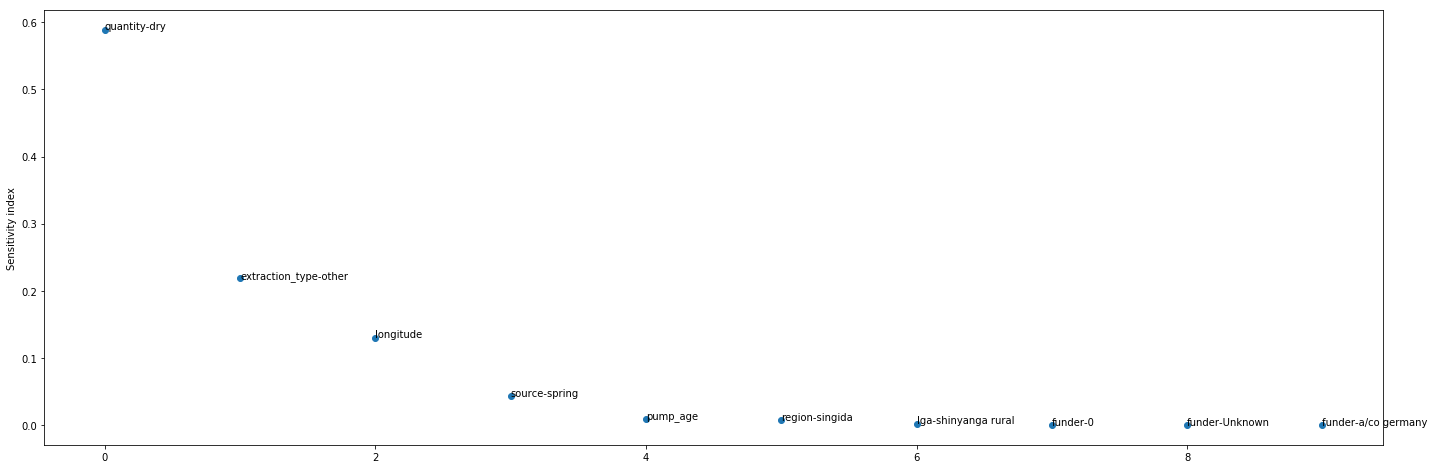

In [19]:
# Plotting most important features
num_top_features = 10
feature_importance = modelDTC.feature_importances_

sorted_f_importance = sorted(zip(X_trans_names, feature_importance),
                             key=lambda x:x[-1],
                             reverse=True)
fig, axe = plt.subplots(1,1)
axe.plot([elm[-1] for elm in sorted_f_importance][:num_top_features], 'o')

for (id, (f_name, f_importance)) in enumerate(sorted_f_importance[:num_top_features]):
    axe.annotate('{}'.format(f_name),xy=(id, f_importance))
axe.set_ylabel('Sensitivity index')
fig = plt.gcf()
fig.set_size_inches(24,8)

In [20]:
modelRFC = RandomForestClassifier(n_estimators=100, min_samples_split=10, criterion='gini')
modelRFC.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
# Accuracy score for Random Forest
y_pred = modelRFC.predict(X_test)
scoreRFC = accuracy_score(y_pred, y_test)
print('Random Forest Classifier Accuracy: {:.2f}'.format(scoreRFC))

Random Forest Classifier Accuracy: 0.80


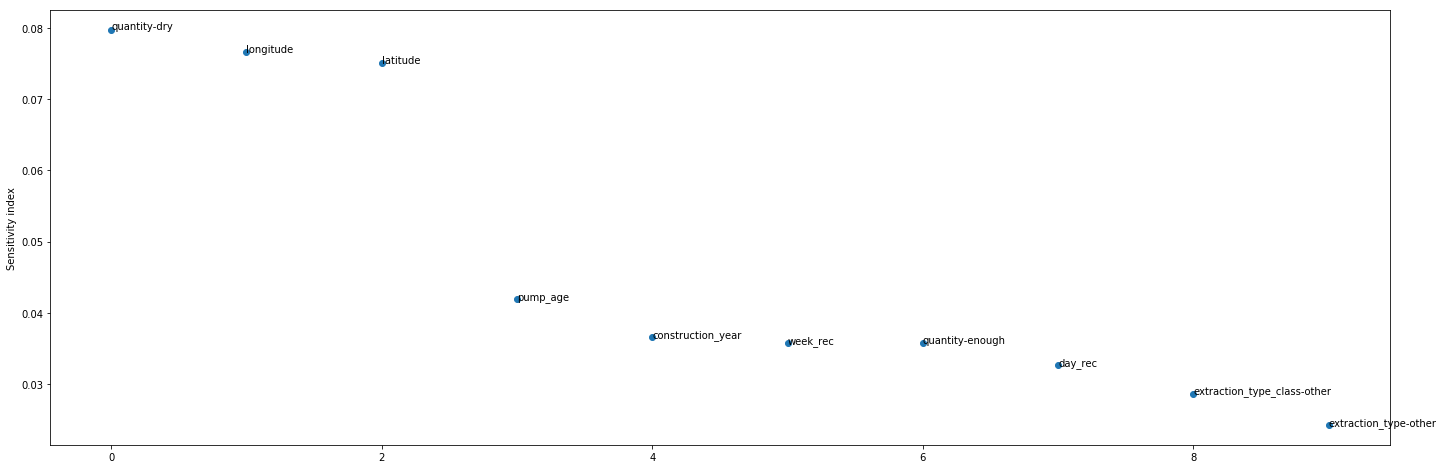

In [22]:
num_top_features = 10
feature_importance = modelRFC.feature_importances_

sorted_f_importance = sorted(zip(X_trans_names, feature_importance),
                             key=lambda x:x[-1],
                             reverse=True)
fig, axe = plt.subplots(1,1)
axe.plot([elm[-1] for elm in sorted_f_importance][:num_top_features], 'o')

for (id, (f_name, f_importance)) in enumerate(sorted_f_importance[:num_top_features]):
    axe.annotate('{}'.format(f_name),xy=(id, f_importance))
axe.set_ylabel('Sensitivity index')
fig = plt.gcf()
fig.set_size_inches(24,8)

In [23]:
modelETC = ExtraTreesClassifier(n_estimators=100,min_samples_split=10)
modelETC.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
# Accuracy score for Extra Trees
y_pred = modelRFC.predict(X_test)
scoreETC = accuracy_score(y_pred, y_test)
print('Extra Trees Classifier Accuracy: {:.2f}'.format(scoreETC))

Extra Trees Classifier Accuracy: 0.80


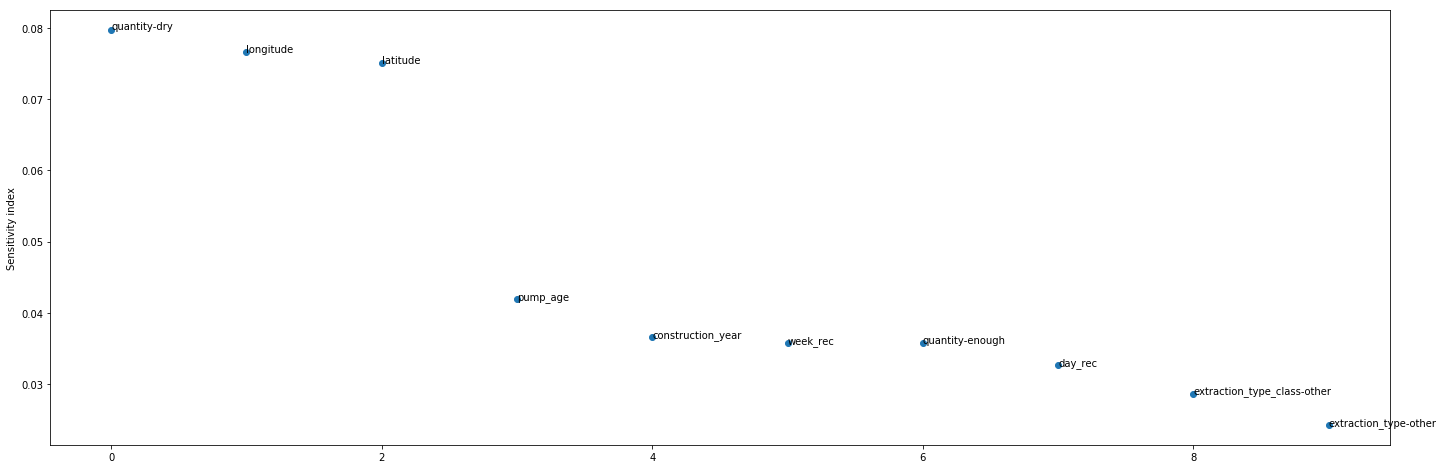

In [25]:
num_top_features = 10
feature_importance = modelETC.feature_importances_

feature_importances_sorted_f_importance = sorted(zip(X_trans_names, feature_importance),
                             key=lambda x:x[-1],
                             reverse=True)
fig, axe = plt.subplots(1,1)
axe.plot([elm[-1] for elm in sorted_f_importance][:num_top_features], 'o')

for (id, (f_name, f_importance)) in enumerate(sorted_f_importance[:num_top_features]):
    axe.annotate('{}'.format(f_name),xy=(id, f_importance))
axe.set_ylabel('Sensitivity index')
fig = plt.gcf()
fig.set_size_inches(24,8)

In [26]:
modelXGB = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree', nrounds = 'min.error.idx', 
                      num_class = 4, maximize = False, eval_metric = 'merror', eta = .2,
                      max_depth = 14, colsample_bytree = .4)

modelXGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, eta=0.2,
       eval_metric='merror', gamma=0, gpu_id=-1, importance_type='gain',
       interaction_constraints=None, learning_rate=0.200000003,
       max_delta_step=0, max_depth=14, maximize=False, min_child_weight=1,
       missing=nan, monotone_constraints=None, n_estimators=100, n_jobs=0,
       nrounds='min.error.idx', num_class=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

In [27]:
# Accuracy score for XGBoost
y_pred = modelXGB.predict(X_test)
scoreXGB = accuracy_score(y_pred, y_test)
print('XGBoost Classifier Accuracy: {:.2f}'.format(scoreXGB))

XGBoost Classifier Accuracy: 0.80


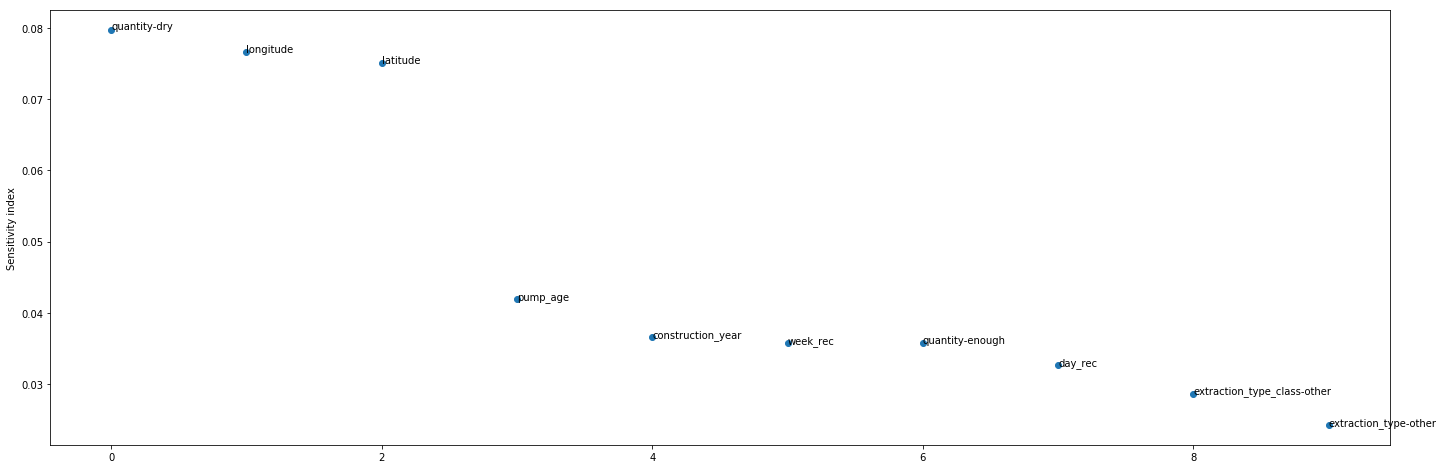

In [28]:
num_top_features = 10
feature_importance = modelXGB.feature_importances_

feature_importances_sorted_f_importance = sorted(zip(X_trans_names, feature_importance),
                             key=lambda x:x[-1],
                             reverse=True)
fig, axe = plt.subplots(1,1)
axe.plot([elm[-1] for elm in sorted_f_importance][:num_top_features], 'o')

for (id, (f_name, f_importance)) in enumerate(sorted_f_importance[:num_top_features]):
    axe.annotate('{}'.format(f_name),xy=(id, f_importance))
axe.set_ylabel('Sensitivity index')
fig = plt.gcf()
fig.set_size_inches(24,8)

Random Forest 0.8019079685746352
Decision Tree 0.6828282828282828
Extra Trees 0.8019079685746352
XGBoost 0.8026936026936027


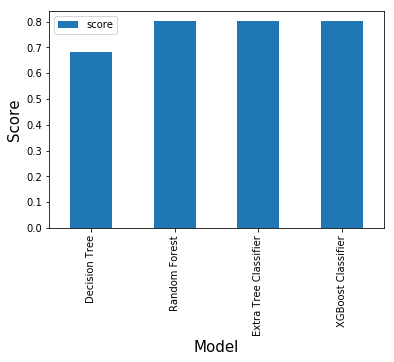

In [29]:
# plotting the scores between different models
#scoreRFC = modelRFC.score(X_test, y_test)
#scoreDTC = modelDTC.score(X_test, y_test)
#scoreETC = modelETC.score(X_test, y_test)
#scoreXGB = modelXGB.score(X_test, y_test)
# Already defined above


print ('Random Forest' ,scoreRFC)
print ('Decision Tree', scoreDTC)
print ('Extra Trees', scoreETC)
print('XGBoost', scoreXGB)


pd.DataFrame([
    ("Decision Tree", scoreDTC),
    ("Random Forest", scoreRFC),
    ("Extra Tree Classifier", scoreETC),
    ("XGBoost Classifier", scoreXGB),
    ], columns=["Model", "score"]).plot(x="Model", y="score", kind="bar", fontsize=10)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Score', fontsize=15)
plt.show()